# Decision Trees and Random Forests Project

## Importing and Exploring Datasets

In [47]:
import pandas as pd

df_iris = pd.read_csv("Datasets/Iris.csv")
df_melbourne_housing = pd.read_csv("Datasets/melb_data.csv")

### Initial Exploration of Both Datasets

#### Display and Analyze Top Rows of Datasets

In [48]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df_melbourne_housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


#### Analyse Dataset Sizes, Null Values, and Data Types

In [50]:
#Size of datasets
print(df_iris.shape)
print(df_melbourne_housing.shape)

(150, 6)
(13580, 21)


In [51]:
# Checking for null values and data types in iris dataset
print("Null Values:\n", df_iris.isnull().sum())
print("Data Types:\n", df_iris.dtypes)

Null Values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Data Types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [52]:
# Checking for null values and data types in melbourne_housing dataset
print("Null Values:\n", df_melbourne_housing.isnull().sum())
print("Data Types:\n", df_melbourne_housing.dtypes)

Null Values:
 Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64
Data Types:
 Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        objec

### In-Depth Analysis of Iris Dataset

#### Iris Species Count Visualization

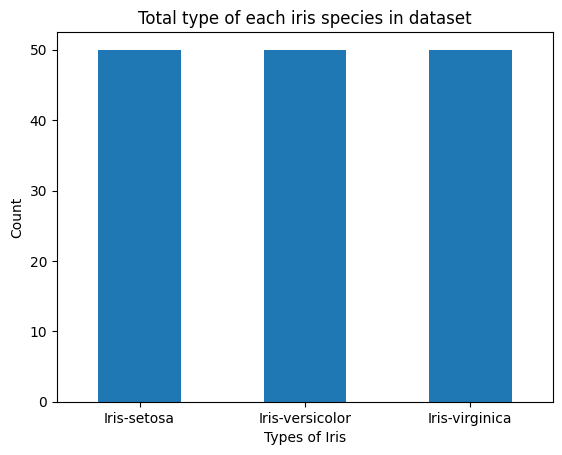

In [53]:
import matplotlib.pyplot as plt
#Count of each iris species
df_iris['Species'].value_counts().plot(kind='bar')
    
plt.xticks(rotation='horizontal')
plt.xlabel('Types of Iris')
plt.ylabel('Count')
plt.title('Total type of each iris species in dataset')
plt.show()

#### Boxplot Analysis by Iris Species

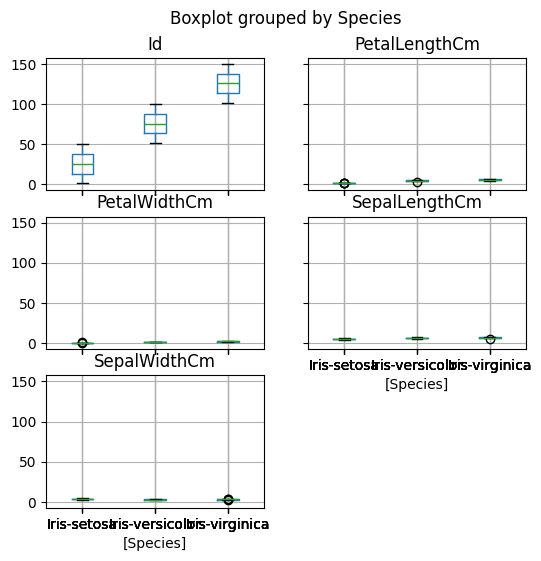

In [54]:
df_iris.boxplot(by = "Species", figsize = (6, 6))
plt.show()

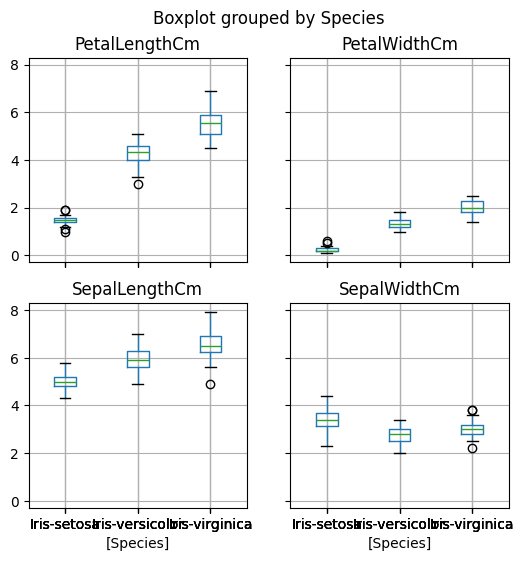

In [55]:
# Dropping the 'Id' column as it's not needed for the boxplots
# Using boxplot to view features across different Iris species
df_iris.drop("Id", axis=1).boxplot(by = "Species", figsize = (6, 6))
plt.show()

#### Description of Iris Data

In [56]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### In-Depth Analysis of Melbourne Housing Dataset

#### Dataset Overview

In [57]:
df_melbourne_housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [58]:
# Features with missing values
missing = df_melbourne_housing.isnull().sum().sort_values(ascending = False).head(5)
missing

BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Car               62
Suburb             0
dtype: int64

**Before Data Processing Dataset**

In [59]:
# Keeping a 'beforeProcessing' dataset for predictions later
beforeProcessing = df_melbourne_housing.copy()

#### Identifying and Handling Missing Values

In [60]:
df_melbourne_housing['Car'].value_counts()

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

### Data Preprocessing for Predictive Modeling

#### Handling Null Values in Features

In [61]:
# Filling null value
df_melbourne_housing['Car'].fillna(0, inplace = True)

# confimation after filling the null values
print("Null values now :", df_melbourne_housing['Car'].isnull().sum())

Null values now : 0


In [62]:
df_melbourne_housing['CouncilArea'].value_counts()
df_melbourne_housing['YearBuilt'].value_counts()

YearBuilt
1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1897.0      1
1933.0      1
1830.0      1
1901.0      1
1857.0      1
Name: count, Length: 144, dtype: int64

In [63]:
df_melbourne_housing['CouncilArea'].fillna('Unavailable', inplace = True)
df_melbourne_housing['YearBuilt'].fillna("Unknown", inplace=True)
df_melbourne_housing['BuildingArea'].fillna(0, inplace = True)

C:\Users\c_bro\AppData\Local\Temp\ipykernel_296\1184542709.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_melbourne_housing['YearBuilt'].fillna("Unknown", inplace=True)


#### Target and Predictor Selection

In [64]:
melbourne_dataset_y = df_melbourne_housing.Price

# Keep only numerical predictors
melbourne_dataset_X = df_melbourne_housing.drop(['Price'], axis=1).select_dtypes(exclude=['object'])

In [65]:
beforeProcessing_y = beforeProcessing.Price

beforeProcessing_X = beforeProcessing.drop(['Price'], axis=1).select_dtypes(exclude=['object'])

#### Region-Based Housing Data Analysis

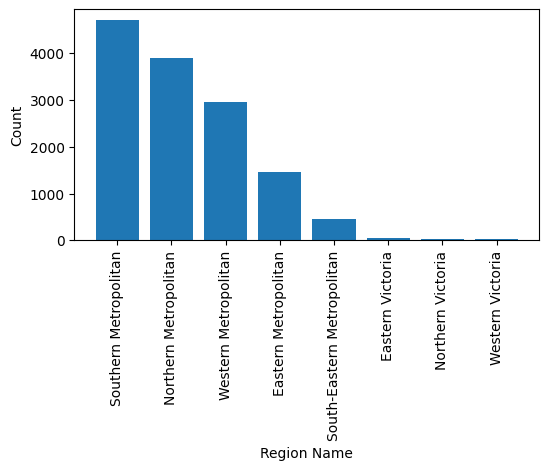

In [66]:
# Calculating housing for each region
region_counts = df_melbourne_housing['Regionname'].value_counts()

plt.figure(figsize=(6, 3))
plt.bar(region_counts.index, region_counts.values)

# Setting the labels and titles
plt.xlabel("Region Name")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotating the x labels for better readability

plt.show()

### Data Cleaning for Iris Dataset

In [67]:
df_iris.drop(columns=['Id'], inplace=True)

In [68]:
df_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Building and Visualizing Decision Trees


#### Simple Decision Trees Using Sepal Measurements of Iris

<function matplotlib.pyplot.show(close=None, block=None)>

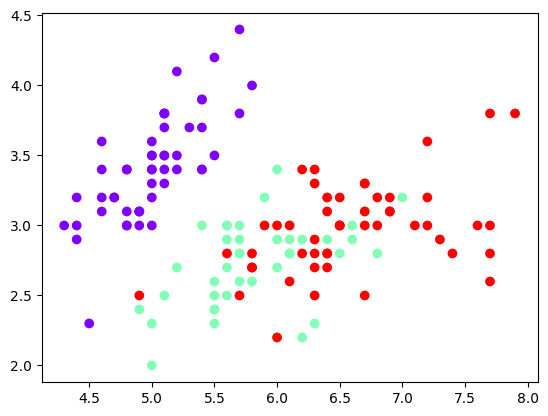

In [69]:

iris_X = df_iris[['SepalLengthCm','SepalWidthCm']].values
# Converts species names to numbers
iris_y = df_iris['Species'].factorize()[0] 
plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap='rainbow')
plt.show

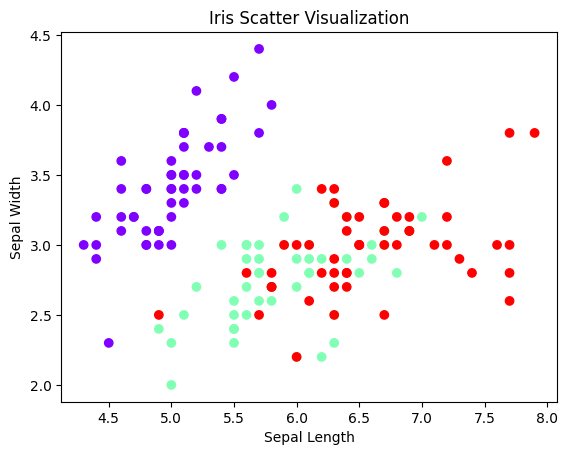

In [70]:
# Improved labelling
plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Scatter Visualization')
plt.show()

The code plots the sepal length and width of iris flowers on a graph, with the different colors representing different species. This visualization helps identify patterns and natural groupings among the species based on these two features, which could inform a classification model.

#### Testing on `visualize_classifier` function

In [71]:
import numpy as np

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    

#### Improved Visualization of Decision Trees

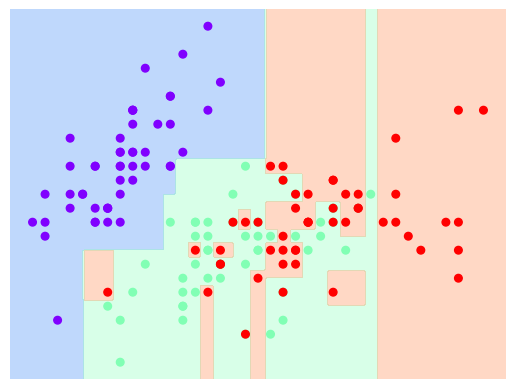

In [72]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier().fit(iris_X, iris_y)

visualize_classifier(tree, iris_X, iris_y)

### Training and Testing Split for Melbourne Housing Dataset


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Splitting Data into Training and Testing Sets
X_train, X_valid, y_train, y_valid = train_test_split(melbourne_dataset_X, melbourne_dataset_y, train_size=0.8, test_size=0.2,
                                                      random_state=0)


## Visualizing Decision Trees

### Visualizing Iris Decision Trees


In [74]:
iris_classifier = DecisionTreeClassifier(max_depth=2, random_state = 36)

fourD_X = df_iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
new_Y = df_iris.Species

iris_classifier.fit(fourD_X, new_Y)

DecisionTreeClassifier(max_depth=2, random_state=36)

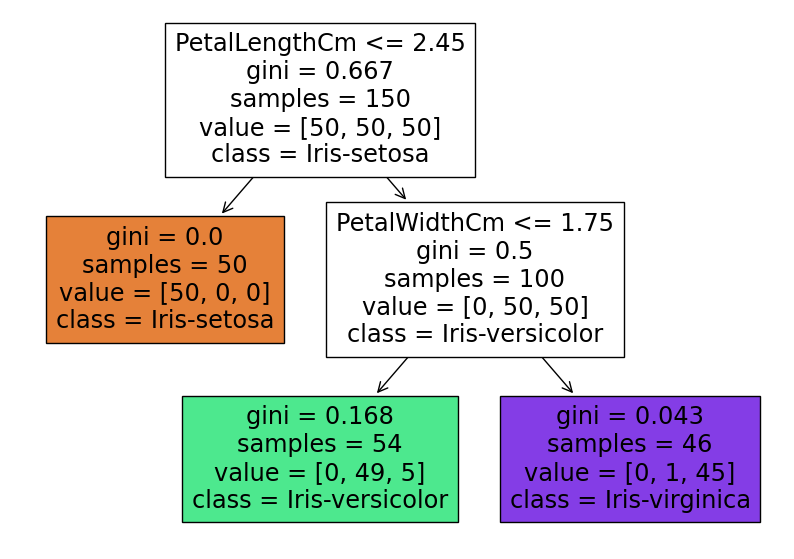

In [75]:
from sklearn.tree import plot_tree

# new_tree is the trained decision tree and 'labels' are the column names
plt.figure(figsize=(10,7))
plot_tree(iris_classifier, feature_names=fourD_X.columns, class_names=new_Y.unique(), max_depth=2, filled=True)
plt.show()

### Understanding Decision Tree Predictions

#### Analysis of Petal Measurements in Decision Making  

The decision tree makes predictions by traversing nodes: starting at the root, it checks a flower’s petal length, moving left for small sizes to predict Iris-Setosa, or right for larger, then checks petal width to distinguish between Iris-Versicolor and Iris-Virginica.  

The decision tree for the Iris dataset mainly uses petal length and width to classify species. It suggests that Iris setosa can be distinguished by a shorter petal length, while Iris versicolor and Iris virginica are further classafied by petal width.

#### Explanation of Gini Impurity  

In this decision tree "gini" refers to the Gini impurity which is a measure for node inpurity. Gini impurity is used in decision trees to evaluate the chance of incorrect classification of a new sample based on the classes' distribution at a node.

Reference: https://medium.com/ai-made-simple/decision-trees-part-1-da4e613d2369  

In [76]:
# Create the decision tree model
housing_predictor_model = DecisionTreeRegressor(random_state=0)

# Train the model
housing_predictor_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

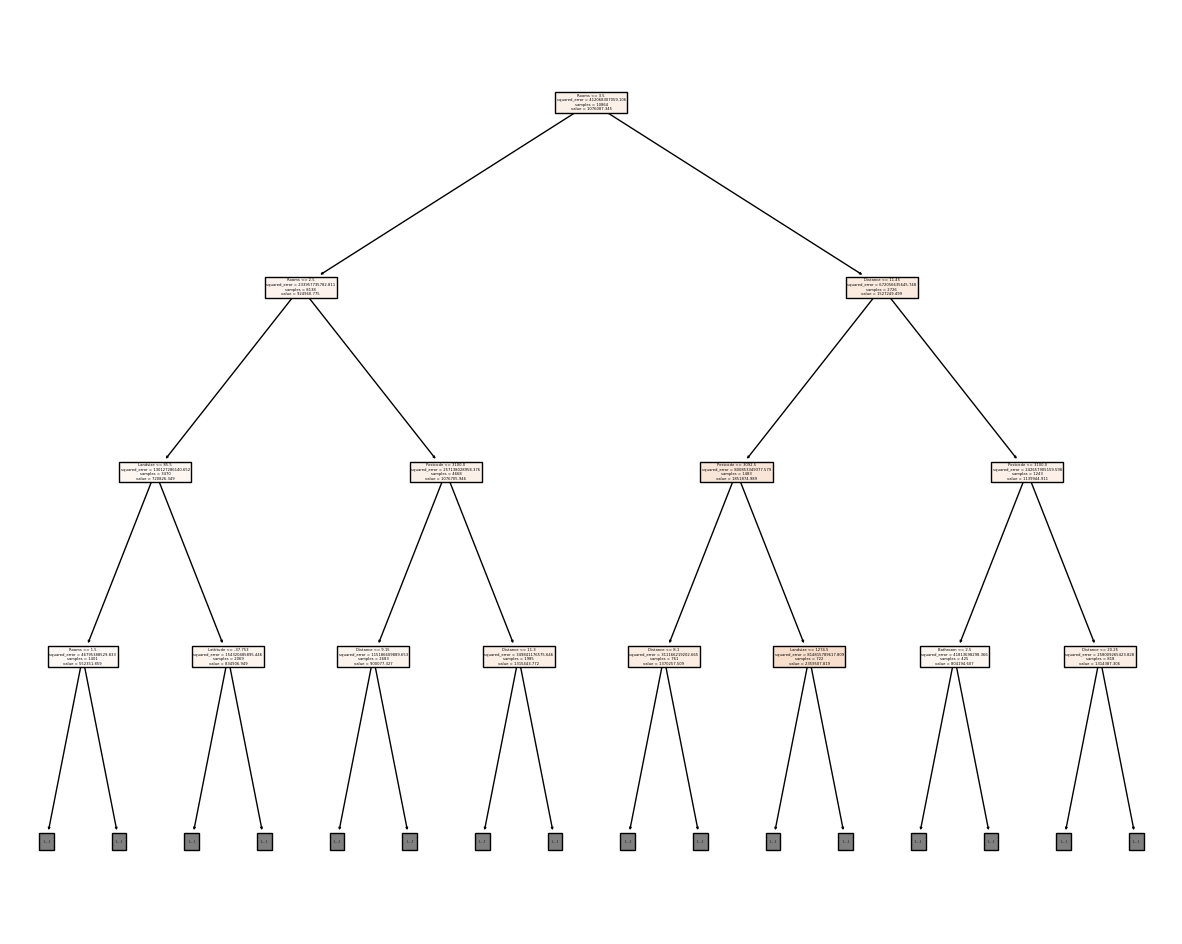

In [77]:
plt.figure(figsize=(15,12))
plot_tree(housing_predictor_model, feature_names=melbourne_dataset_X.columns, filled=True, max_depth=3)
plt.show()

This decision tree looks very similar to the decision tree built for Iris, but the difference is that instead of predicting a class in each node, it predicts a value. 

### Probability Estimation Using Decision Trees

For a given flower with petals 5 cm long and 1.5 cm wide, the decision tree estimates the probabilities of belonging to each Iris species by going through the nodes. At each node, a decision is made based on the features until a leaf node is reached. The leaf node provides the probabilities for each class.

### Prediction Output

Using the probabilities, the decision tree can predict the class of the instance. The class with the highest probability is chosen as the output prediction.

In [78]:
# Predicting class probabilities for an instance with specific features
probabilities = iris_classifier.predict_proba([[1,1, 5, 1.5]])
print(f"Class probabilities: {probabilities}")

# Predicting the class for the same instance
predicted_class = iris_classifier.predict([[1,1, 5, 1.5]])
print(f"Predicted class: {predicted_class[0]}")

Class probabilities: [[0.         0.90740741 0.09259259]]
Predicted class: Iris-versicolor


c:\Users\c_bro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\c_bro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Prediction Comparison Pre and Post Data Processing

#### Pre Data Proccessing Predictions

In [79]:
old_X_train, old_X_valid, old_y_train, old_y_valid = train_test_split(beforeProcessing_X, beforeProcessing_y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

housing_predictor_model_old = DecisionTreeRegressor(random_state=0)
# Train the model
housing_predictor_model_old.fit(old_X_train, old_y_train)

sample_data = old_X_valid.iloc[1]
actual_price = old_y_valid.iloc[1]

# Making a prediction
predicted_price = housing_predictor_model_old.predict([sample_data])

print(f"The predicted house price is: {predicted_price[0]}")
print(f"The actual house price is: {actual_price}")

The predicted house price is: 924960.7751290243
The actual house price is: 815000.0


c:\Users\c_bro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


#### Post Data Proccessing Predictions

In [80]:
# Select a sample for prediction using Housing dataset (e.g., the first row of test data)
sample_data = X_valid.iloc[1]
actual_price = y_valid.iloc[1]

# Making a prediction
predicted_price = housing_predictor_model.predict([sample_data])

print(f"The predicted house price is: {predicted_price[0]}")
print(f"The actual house price is: {actual_price}")


The predicted house price is: 955000.0
The actual house price is: 815000.0


c:\Users\c_bro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Model is more accurate without the modification to the dataset

  
  
## Introduction to Random Forests  

### Implementation in Scikit-Learn

Random Forests are an ensemble method using multiple overfitting decision trees (bagging) to reduce overfitting. Each tree in the ensemble makes a classification, and the average result provides a more accurate prediction. This can be implemented in Scikit-Learn using the BaggingClassifier meta-estimator.

### Building Random Forest Classifiers

#### Applying `BaggingClassifier`

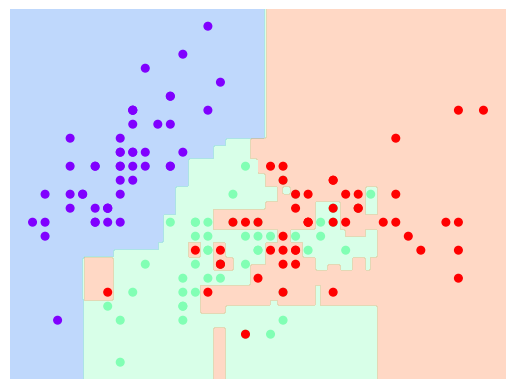

In [81]:
from sklearn.ensemble import BaggingClassifier

X = df_iris[['SepalLengthCm','SepalWidthCm']].values
y = df_iris['Species'].factorize()[0] 

# Initialize the base classifier and the Bagging ensemble
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

# Fit the model
bag.fit(X, y)

visualize_classifier(bag, X, y)

#### Applying Random Forest to Iris Data

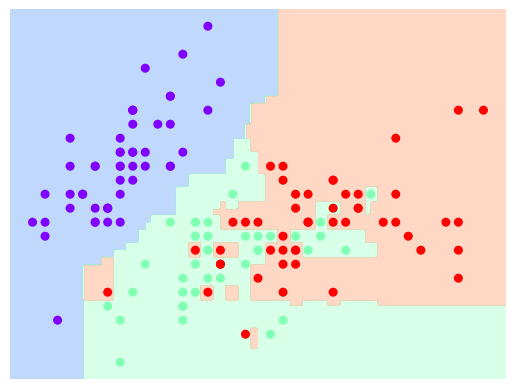

In [82]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

#### Using Different Feature Sets

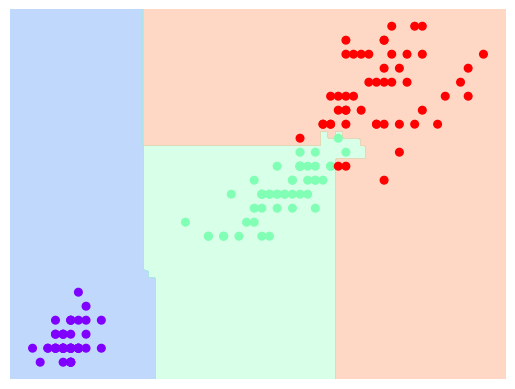

In [83]:
X = df_iris[['PetalLengthCm','PetalWidthCm']].values
y = df_iris['Species'].factorize()[0] 

# Initialize the base classifier and the Bagging ensemble
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

# Fit the model
bag.fit(X, y)

visualize_classifier(bag, X, y)

### Random Forest Regression Model for Predicting Housing Prices

#### Model Training and Evaluation

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_valid)

# Evaluating the model
mae = mean_absolute_error(y_valid, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 170618.97895548423


#### Impact of Preprocessing on Model Accuracy

In [85]:
# Filling missing values in the training and validation sets with the mean
old_X_train.fillna(old_X_train.mean(), inplace=True)
old_X_valid.fillna(old_X_valid.mean(), inplace=True)

model.fit(old_X_train, old_y_train)

# Making predictions
predictions = model.predict(old_X_valid)

# Evaluating the model
mae = mean_absolute_error(old_y_valid, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 169712.29865462164


I must have made some large errors when processing the data above because the data before proccessing keeps being more accurate then the data that is.

In [86]:
model = RandomForestRegressor(n_estimators=300, random_state=0)
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_valid)

# Evaluating the model
mae = mean_absolute_error(y_valid, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 168971.24250230848


Having more estimators does provide slighly better predictions

## Example: Random Forest for Classifying Digits

### Loading and Exploring Digit Data

In [87]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [88]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


<Figure size 600x600 with 0 Axes>

### Model Training and Performance Evaluation

In [89]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [90]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.96      0.96      0.96        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### Confusion Matrix Visualization

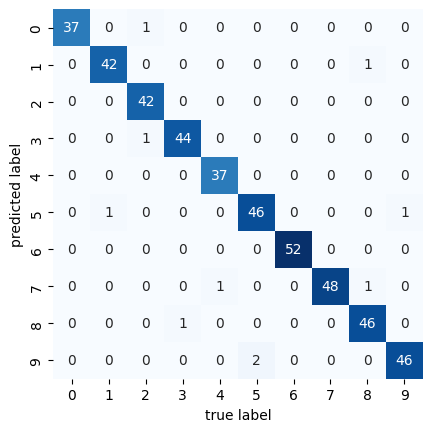

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');